In [1]:
import pandas as pd
from collections import Counter
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline


train = pd.read_csv('fashion-mnist_train.csv')
print(train.shape)

train.head()

x = train.drop('label', axis=1).as_matrix()
t = train['label'].as_matrix()

x_train0, x_test0, t_train, t_test = train_test_split(x, t, train_size=0.8, test_size=0.2, random_state=1)

print(x_train0.shape)
print(x_test0.shape)

(60000, 785)


/Users/okihayas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/okihayas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(48000, 784)
(12000, 784)


In [2]:
x_train = x_train0.reshape(48000, 1, 28, 28)
x_test = x_test0.reshape(12000, 1, 28, 28)

print(x_train.shape)
print(x_test.shape)

(48000, 1, 28, 28)
(12000, 1, 28, 28)


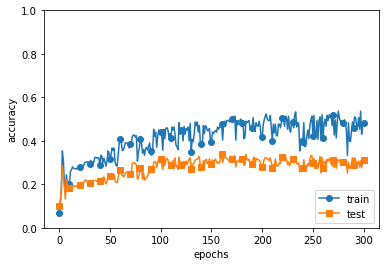

In [14]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

x_train = x_train[:5000]
t_train = t_train[:5000]

use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='adam', optimizer_param={'lr': 0.01}, verbose=False)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()